# Deep Learning
### A Basic Introduction in *Three Acts*

# Index

1\. <a href="#/2/1">Act 1: Motivation and Basics</a>
   * <a href="#/17/1">The perceptron</a>.
   * <a href="#/33/1">Multilayer Perceptrons</a>.
   
2\. <a href="#/44/1">Act 2: Convolutional Neural Networks (CNN)</a>:
   * <a href="#/75/1">Pretrained models</a>.
   * <a href="#/81/1">Feature extraction</a>.

3\. <a href="#/86/1">Act 3: Recurrent Neural Networks (RNNs)</a>:

# Challenges  Motivating Deep Learning

* ### Central problems of AI: Speech recognition and Object recognition.
* ### The problem of representation learning.

## DL, A New Hope

* ### Universal Approximation Theorem (1989, 1990)


# Origins

* Term was introduced by Rina Dechter in 1986.
* The first attemps of modeling the brain (McCulloch, Pitts, 1940).
* Distributed representation (Hinton et al, 1986).
* Deep Belief (Hinton, 2006).

<center><img src="./images/dlframeworks.png" style="width: 1200px;"/></center>

<center><img src="./images/gluon.png" style="width: 1200px;"/></center>

# Logistic regression

<center><img src="./images/logistic.png" style="width: 400px;"/></center>

$\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$


<center><img src="./images/mlp.png" style="width: 400px;"/></center>

$h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
$h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
$h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$ 
$ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]$


# Basic concepts.

* Activation function.
* Cost Function.
* Gradient-Based Learning.
* Back propagation algorithm.

# Activation Functions
* ### The role of activation functions is make neural networks non-linear.
* ### Ensure that the representation in the input space is mapped to a different space in the output.


<center><img src="./images/activation-functions.png" style="width: 800px;"/></center>

# Cost Function
## Cross-entropy & Score function.

* A measure of how good a ML algorithm is doing on a given dataset.
* To minimize the cost, we search the direction in which we should change the parameters in order to maximize the likelihood.

<center><img src="./images/cross-entropy.gif" style="width: 1000px;"/></center>

# Gradient-Based Learning
##  Stochastic Gradient Descent (SGD).

* Learning $\to$ Minimizing the Cost Function.
* Numerical method to differentiate a multidimensional function.


<center><img src="./images/optimizers.gif" style="width: 1000px;"/></center>

# Back-Propagation algorithm
## Recursive Chain Rule of Calculus

* Minimize the cost function of a network with respecto to the weights.

## Historical Remarks
* Automatic Differentiation of networks, Seppo Linnainmaa (1970).
* Rumelhart, Hinton and Williams (1986).
* LeCun (1987).

# The Perceptron
## Multiclass logistic regression from scratch

<center><img src="./images/MarkI_perceptron.jpeg" style="width: 600px;"/></center>


## The MNIST dataset

<center><img src="./images/mnist.jpg" style="width: 700px;"/></center>

In [1]:
from __future__ import print_function
import mxnet as mx
import numpy as np
from mxnet import nd, autograd
from mxnet import gluon
import matplotlib.pyplot as plt


# lets define first if we want to use cpu or gpu.
# Note: don't use gpu on small projects, it is a waste of resources!

ctx = mx.cpu()
# or if you're lucky enough!
#ctx = mx.gpu(0)

In [2]:
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)
mnist_train = mx.gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = mx.gluon.data.vision.MNIST(train=False, transform=transform)

In [3]:
image, label = mnist_train[0]
print(image.shape, label)

(28, 28, 1) 5.0


In [4]:
im = mx.nd.tile(image, (1,1,3))
print(im.shape)

(28, 28, 3)


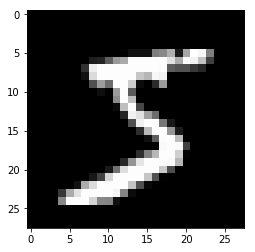

In [5]:
import matplotlib.pyplot as plt
plt.imshow(im.asnumpy())
plt.show()

In [6]:
num_inputs = 784
num_outputs = 10

In [7]:
batch_size = 64
train_data = mx.gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [8]:
W = nd.random_normal(shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)

params = [W, b]

In [9]:
for param in params:
    param.attach_grad()

In [10]:
def softmax(y_linear):
    exp = nd.exp(y_linear-nd.max(y_linear))
    norms = nd.sum(exp, axis=0, exclude=True).reshape((-1,1))
    return exp / norms

In [11]:
sample_y_linear = nd.random_normal(shape=(2,10))
sample_yhat = softmax(sample_y_linear)
print(sample_yhat)


[[ 0.15231057  0.16100822  0.12744138  0.11056453  0.1451381   0.11903051
   0.05478317  0.00829658  0.02635268  0.09507422]
 [ 0.03087835  0.17347507  0.02534506  0.13982475  0.26483524  0.06327081
   0.07679356  0.12304549  0.07744105  0.02509063]]
<NDArray 2x10 @cpu(0)>


In [12]:
print(nd.sum(sample_yhat, axis=1))


[ 0.99999994  1.        ]
<NDArray 2 @cpu(0)>


In [13]:
def net(X):
    y_linear = nd.dot(X, W) + b
    yhat = softmax(y_linear)
    return yhat

In [14]:
def cross_entropy(yhat, y):
    return - nd.sum(y * nd.log(yhat), axis=0, exclude=True)

In [15]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

<center><img src="./images/mnist-perceptron.png" style="width: 700px;"/></center>

In [16]:
def evaluate_accuracy(data_iterator, net):
    numerator = 0.
    denominator = 0.
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx).reshape((-1,784))
        label = label.as_in_context(ctx)
        label_one_hot = nd.one_hot(label, 10)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        numerator += nd.sum(predictions == label)
        denominator += data.shape[0]
    return (numerator / denominator).asscalar()

## What should be the value of `evaluate_accuracy(test_data,net)` ?

https://goo.gl/tFGNXT

## Results

https://goo.gl/kyg5HS

In [17]:
evaluate_accuracy(test_data, net)

0.098999999

In [18]:
epochs = 11
moving_loss = 0.
learning_rate = .001
smoothing_constant = .01
niter=0

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx).reshape((-1,784))
        label = label.as_in_context(ctx)
        label_one_hot = nd.one_hot(label, 10)
        with autograd.record():
            output = net(data)
            loss = cross_entropy(output, label_one_hot)
        loss.backward()
        SGD(params, learning_rate)

        ##########################
        #  Keep a moving average of the losses
        ##########################
        niter +=1
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * nd.mean(loss).asscalar()
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    if e%2==0:
        print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" 
              % (e, est_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 1.35941667442, Train_acc 0.762117, Test_acc 0.7683
Epoch 2. Loss: 0.816571140602, Train_acc 0.838967, Test_acc 0.8465
Epoch 4. Loss: 0.64673940006, Train_acc 0.8621, Test_acc 0.8674
Epoch 6. Loss: 0.579446687393, Train_acc 0.873117, Test_acc 0.8776
Epoch 8. Loss: 0.510120900683, Train_acc 0.880683, Test_acc 0.8834
Epoch 10. Loss: 0.482666559677, Train_acc 0.885183, Test_acc 0.8874


(10, 28, 28, 1)


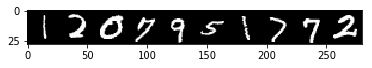

model predictions are: 
[ 1.  2.  0.  9.  9.  8.  1.  7.  7.  2.]
<NDArray 10 @cpu(0)>


In [19]:
# Define the function to do prediction
def model_predict(net,data):
    output = net(data)
    return nd.argmax(output, axis=1)

# let's sample 10 random data points from the test set
sample_data = mx.gluon.data.DataLoader(mnist_test, 10, shuffle=True)
for i, (data, label) in enumerate(sample_data):
    data = data.as_in_context(ctx)
    print(data.shape)
    im = nd.transpose(data,(1,0,2,3))
    im = nd.reshape(im,(28,10*28,1))
    imtiles = nd.tile(im, (1,1,3))

    plt.imshow(imtiles.asnumpy())
    plt.show()
    pred=model_predict(net,data.reshape((-1,784)))
    print('model predictions are:', pred)
    break


 ## We can get nearly 90% accuracy at this task just by training a linear model for a few seconds! You might reasonably conclude that this problem is too easy to be taken seriously by experts.

# Multilayer perceptrons from scratch

In [20]:
from __future__ import print_function
import mxnet as mx
import numpy as np
from mxnet import nd, autograd
ctx = mx.cpu()


In [21]:
num_inputs = 784
num_outputs = 10
batch_size = 64
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)
train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
                                      batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
                                     batch_size, shuffle=False)

In [22]:
#######################
#  Set some constants so it's easy to modify the network later
#######################
num_hidden = 128
weight_scale = .01

#######################
#  Allocate parameters for the first hidden layer
#######################
W1 = nd.random_normal(shape=(num_inputs, num_hidden), scale=weight_scale, ctx=ctx)
b1 = nd.random_normal(shape=num_hidden, scale=weight_scale, ctx=ctx)

#######################
#  Allocate parameters for the second hidden layer
#######################
W2 = nd.random_normal(shape=(num_hidden, num_hidden), scale=weight_scale, ctx=ctx)
b2 = nd.random_normal(shape=num_hidden, scale=weight_scale, ctx=ctx)

#######################
#  Allocate parameters for the output layer
#######################
W3 = nd.random_normal(shape=(num_hidden, num_outputs), scale=weight_scale, ctx=ctx)
b3 = nd.random_normal(shape=num_outputs, scale=weight_scale, ctx=ctx)

params = [W1, b1, W2, b2, W3, b3]

In [23]:
for param in params:
    param.attach_grad()

In [24]:
def relu(X):
    return nd.maximum(X, nd.zeros_like(X))

def softmax(y_linear):
    exp = nd.exp(y_linear-nd.max(y_linear))
    partition = nd.nansum(exp, axis=0, exclude=True).reshape((-1, 1))
    return exp / partition


def cross_entropy(yhat, y):
    return - nd.nansum(y * nd.log(yhat), axis=0, exclude=True)


def softmax_cross_entropy(yhat_linear, y):
    return - nd.nansum(y * nd.log_softmax(yhat_linear), axis=0, exclude=True)

def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [25]:
def net(X):
    #######################
    #  Compute the first hidden layer
    #######################
    h1_linear = nd.dot(X, W1) + b1
    h1 = relu(h1_linear)

    #######################
    #  Compute the second hidden layer
    #######################
    h2_linear = nd.dot(h1, W2) + b2
    h2 = relu(h2_linear)

    #######################
    #  Compute the output layer.
    #  We will omit the softmax function here
    #  because it will be applied
    #  in the softmax_cross_entropy loss
    #######################
    yhat_linear = nd.dot(h2, W3) + b3
    return yhat_linear

<center><img src="./images/mnist-mlp.png" style="width: 1000px;"/></center>

In [26]:
def evaluate_accuracy(data_iterator, net):
    numerator = 0.
    denominator = 0.
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx).reshape((-1, 784))
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        numerator += nd.sum(predictions == label)
        denominator += data.shape[0]
    return (numerator / denominator).asscalar()

In [27]:
epochs = 10
learning_rate = .001
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx).reshape((-1, 784))
        label = label.as_in_context(ctx)
        label_one_hot = nd.one_hot(label, 10)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label_one_hot)
        loss.backward()
        SGD(params, learning_rate)

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss)

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    if e%2==0: 
        print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %
              (e, moving_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 0.698246447368, Train_acc 0.82555, Test_acc 0.8339
Epoch 2. Loss: 0.229568195774, Train_acc 0.93795, Test_acc 0.9369
Epoch 4. Loss: 0.143397152868, Train_acc 0.960667, Test_acc 0.9529
Epoch 6. Loss: 0.102218189091, Train_acc 0.972283, Test_acc 0.9616
Epoch 8. Loss: 0.0779726523642, Train_acc 0.980933, Test_acc 0.9677


## It seems everything works! Or maybe we are missing something?

# With great flexibility comes overfitting liability

## Include Regularization:
* $l1$ and $l2$
* Dropout (Srivastava, Hinton  et al., 2012).

# 10 mins break?

# Convolutional Neural Networks

* Convolution and pooling layers as part of the network.

<a href="#/1/1">(Index)</a>

# Origins and Motivation

* Object recognition is a hard task.
* Neocognitron (Fukushima, 1980).
* Yann LeCun (1990).
* ImageNet by Fei-Fei Li (2010 onwards).

## The explosion.
* AlexNet by Krizhevsky, Hinton et al. (2012).

<center><img src="./images/cnn.png" style="width: 1200px;"/></center>

## What it is convolution?
* Basically, kind of matrix multiplication.
* Depending of the method, it reduces the size of the original image.


<center><img src="./images/conv.png" style="width: 800px;"/></center>

In [28]:
from scipy import signal as sg

A = [[255, 7, 3],
     [212, 240, 4],
     [218, 216, 230]]

C = [[-1, 1]]

print(sg.convolve(C,A, "valid"))

[[248   4]
 [-28 236]
 [  2 -14]]


In [29]:
from scipy import ndimage
ndimage.convolve(A, C,mode='constant')

array([[248,   4,   3],
       [-28, 236,   4],
       [  2, -14, 230]])

What is the convolution of  
$\begin{bmatrix}
    1  & -1  \\
   -1  & 1  \\
\end{bmatrix}$
with
$[-1 , 1]$

https://goo.gl/Ks3XYM

# Results

https://goo.gl/gFnBjF

In [30]:
print(sg.convolve([[1,-1],[-1,1]],[[1,-1]], "valid"))

[[-2]
 [ 2]]


In [31]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow,subplots
from matplotlib import cm

def image2pixelarray(filepath):
    im = Image.open(filepath).convert('L')
    (width, height) = im.size
    greyscale_map = list(im.getdata())
    greyscale_map = np.array(greyscale_map)
    greyscale_map = greyscale_map.reshape((height, width))
    return greyscale_map

def norm(ar):
    return 255.*np.absolute(ar)/np.max(ar)

def convimage(path,MConv):
    fig, ax = subplots(figsize=(10,10))
    img2p = image2pixelarray(path)
    imgconv = norm(sg.convolve(img2p,MConv))
    img = Image.fromarray(imgconv).convert('L')
    return ax.imshow(np.asarray(img),cmap=cm.gray)

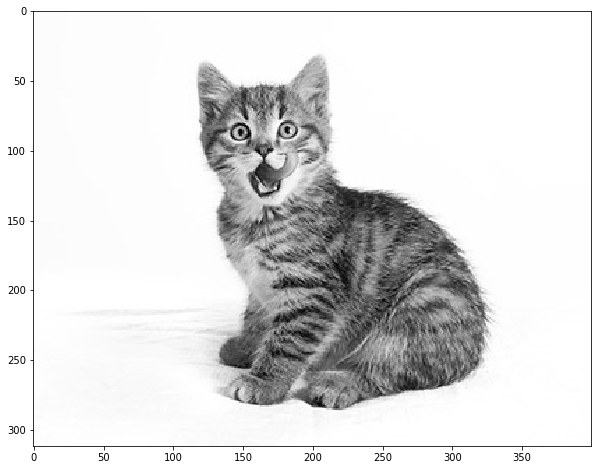

In [32]:
path = 'images/cat.png'
img_or = Image.open(path).convert('L')
fig, ax = subplots(figsize=(10,10))
ax.imshow(np.asarray(img_or),cmap=cm.gray)

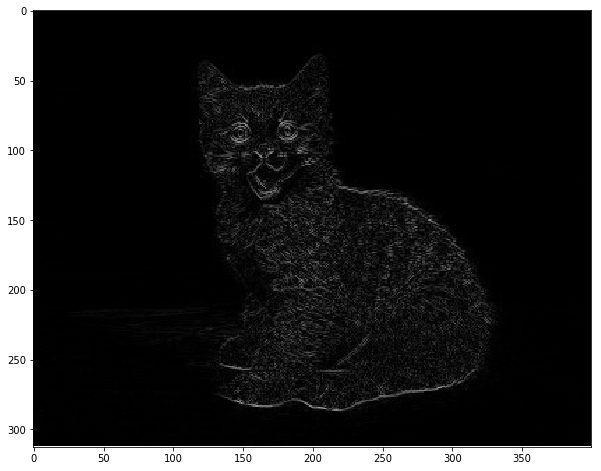

In [33]:
# horizontal edges
M1 = [[1], [-1]]
convimage(path,M1)

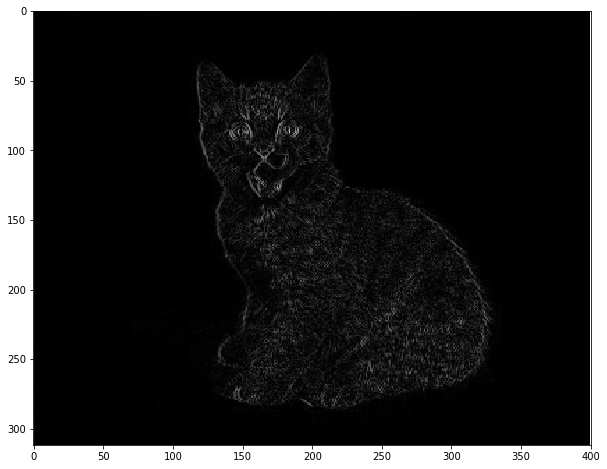

In [34]:
# vertical edges
M2 = [[1, -1]]
convimage(path,M2)

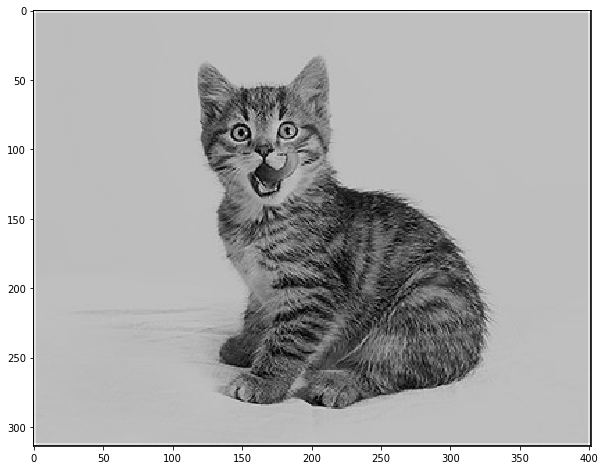

In [35]:
sharpen= [[0, -1, 0],
          [-1, 10, -1],
          [0, -1, 0]]
convimage(path,sharpen)

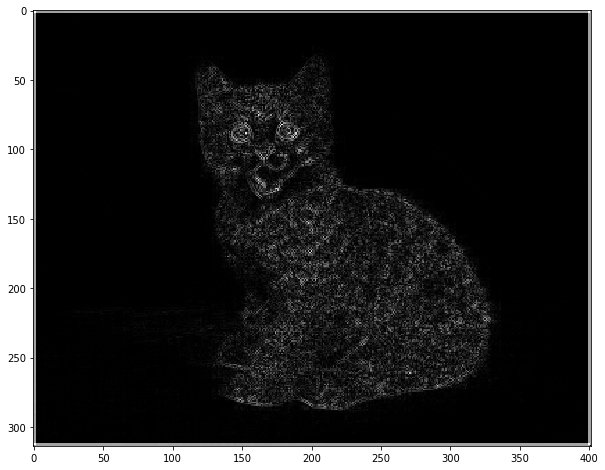

In [36]:
laplacian = [[0, 1, 0],
             [1, -4, 1],
             [0, 1, 0]]
convimage(path,laplacian)

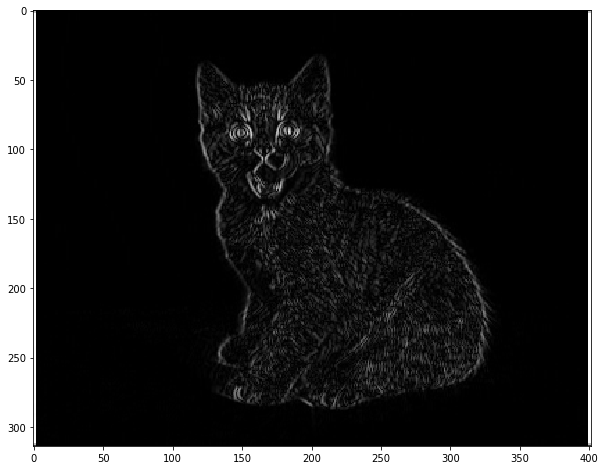

In [37]:
#construct the Sobel x-axis kernel
sobelX = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]
convimage(path,sobelX)

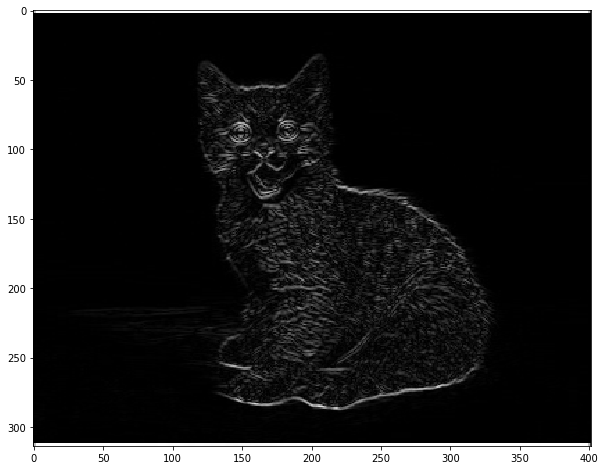

In [38]:
# construct the Sobel y-axis kernel
sobelY = [[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]]
convimage(path,sobelY)

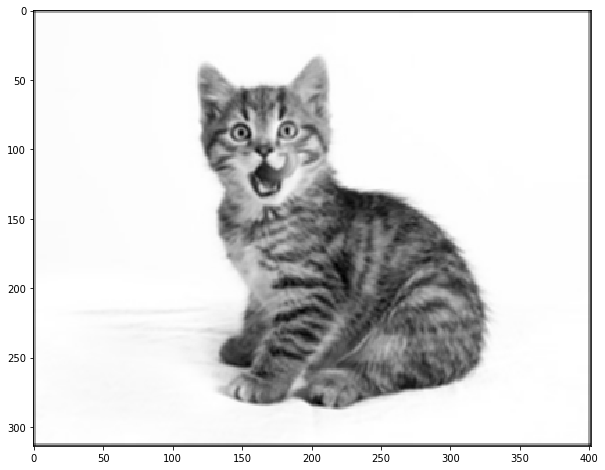

In [39]:
# Box blur
Boxblur = [[0.1,0.1,0.1],
           [0.1,0.1,0.1],
           [0.1,0.1,0.1]]
convimage(path,Boxblur)

## What is pooling?

* Again kind of matrix operation.
* The final image is resized.

In [40]:
import numpy as np
import skimage.measure

a = np.array([
      [  20,  200,   -5,   23],
      [ -13,  134,  119,  100],
      [ 120,   32,   49,   25],
      [-120,   12,    9,   23]
])
skimage.measure.block_reduce(a, (2,2), np.max)

array([[200, 119],
       [120,  49]])

In [41]:
skimage.measure.block_reduce(a, (2,2), np.average)

array([[ 85.25,  59.25],
       [ 11.  ,  26.5 ]])

In [42]:
def poolimage(path,kernel=(2,2),method=np.max):
    fig, ax = subplots(figsize=(10,10))
    img2p = image2pixelarray(path)
    poolimage = norm(skimage.measure.block_reduce(img2p, kernel,method))
    img = Image.fromarray(poolimage).convert('L')
    return ax.imshow(np.asarray(img),cmap=cm.gray)

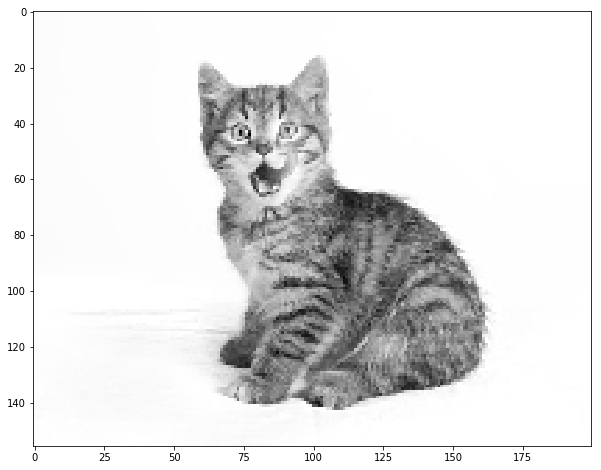

In [43]:
# methods = np.average, np.max
# kernel -> tuple
poolimage(path,(2,2),np.max)

# Convolutional neural networks from scratch

In [44]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd
import numpy as np
ctx = mx.cpu()
mx.random.seed(1)

In [45]:
batch_size = 64
num_inputs = 784
num_outputs = 10
def transform(data, label):
    return nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)
train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
                                      batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
                                     batch_size, shuffle=False)

In [46]:
#######################
#  Set the scale for weight initialization and choose
#  the number of hidden units in the fully-connected layer
#######################
weight_scale = .01
num_fc = 128

W1 = nd.random_normal(shape=(20, 1, 3,3), scale=weight_scale, ctx=ctx)
b1 = nd.random_normal(shape=20, scale=weight_scale, ctx=ctx)

W2 = nd.random_normal(shape=(50, 20, 5, 5), scale=weight_scale, ctx=ctx)
b2 = nd.random_normal(shape=50, scale=weight_scale, ctx=ctx)

W3 = nd.random_normal(shape=(800, num_fc), scale=weight_scale, ctx=ctx)
b3 = nd.random_normal(shape=128, scale=weight_scale, ctx=ctx)

W4 = nd.random_normal(shape=(num_fc, num_outputs), scale=weight_scale, ctx=ctx)
b4 = nd.random_normal(shape=10, scale=weight_scale, ctx=ctx)

params = [W1, b1, W2, b2, W3, b3, W4, b4]

In [47]:
for param in params:
    param.attach_grad()

In [48]:
for data, _ in train_data:
    data = data.as_in_context(ctx)
    break
conv = nd.Convolution(data=data, weight=W1, bias=b1, kernel=(3,3), num_filter=20)
print(conv.shape)

(64, 20, 26, 26)


In [49]:
pool = nd.Pooling(data=conv, pool_type="max", kernel=(2,2), stride=(2,2))
print(pool.shape)

(64, 20, 13, 13)


In [50]:
def relu(X):
    return nd.maximum(X,nd.zeros_like(X))

def softmax(y_linear):
    exp = nd.exp(y_linear-nd.max(y_linear))
    partition = nd.sum(exp, axis=0, exclude=True).reshape((-1,1))
    return exp / partition

def softmax_cross_entropy(yhat_linear, y):
    return - nd.nansum(y * nd.log_softmax(yhat_linear), axis=0, exclude=True)

def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [51]:
def net(X, debug=False):
    ########################
    #  Define the computation of the first convolutional layer
    ########################
    h1_conv = nd.Convolution(data=X, weight=W1, bias=b1, kernel=(3,3), num_filter=20)
    h1_activation = relu(h1_conv)
    h1 = nd.Pooling(data=h1_activation, pool_type="avg", kernel=(2,2), stride=(2,2))
    if debug:
        print("h1_conv shape: %s" % (np.array(h1_conv.shape)))
        print("h1 shape: %s" % (np.array(h1.shape)))

    ########################
    #  Define the computation of the second convolutional layer
    ########################
    h2_conv = nd.Convolution(data=h1, weight=W2, bias=b2, kernel=(5,5), num_filter=50)
    h2_activation = relu(h2_conv)
    h2 = nd.Pooling(data=h2_activation, pool_type="avg", kernel=(2,2), stride=(2,2))
    if debug:
        print("h2_conv shape: %s" % (np.array(h2_conv.shape)))
        print("h2 shape: %s" % (np.array(h2.shape)))

    ########################
    #  Flattening h2 so that we can feed it into a fully-connected layer
    ########################
    h2 = nd.flatten(h2)
    if debug:
        print("Flat h2 shape: %s" % (np.array(h2.shape)))

    ########################
    #  Define the computation of the third (fully-connected) layer
    ########################
    h3_linear = nd.dot(h2, W3) + b3
    h3 = relu(h3_linear)
    if debug:
        print("h3 shape: %s" % (np.array(h3.shape)))

    ########################
    #  Define the computation of the output layer
    ########################
    yhat_linear = nd.dot(h3, W4) + b4
    if debug:
        print("yhat_linear shape: %s" % (np.array(yhat_linear.shape)))

    return yhat_linear

In [52]:
def evaluate_accuracy(data_iterator, net):
    numerator = 0.
    denominator = 0.
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        label_one_hot = nd.one_hot(label, 10)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        numerator += nd.sum(predictions == label)
        denominator += data.shape[0]
    return (numerator / denominator).asscalar()

In [53]:
output = net(data, debug=True)

h1_conv shape: [64 20 26 26]
h1 shape: [64 20 13 13]
h2_conv shape: [64 50  9  9]
h2 shape: [64 50  4  4]
Flat h2 shape: [ 64 800]
h3 shape: [ 64 128]
yhat_linear shape: [64 10]


<center><img src="./images/convnet.png" style="width: 1000px;"/></center>


In [54]:
epochs = 5
learning_rate = .01
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        label_one_hot = nd.one_hot(label, num_outputs)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label_one_hot)
        loss.backward()
        SGD(params, learning_rate)

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss)


    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, moving_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 0.134057929833, Train_acc 0.97085, Test_acc 0.9707
Epoch 1. Loss: 0.0697353267976, Train_acc 0.983233, Test_acc 0.9819
Epoch 2. Loss: 0.0541040707207, Train_acc 0.987617, Test_acc 0.9843
Epoch 3. Loss: 0.0453244627366, Train_acc 0.990533, Test_acc 0.9866
Epoch 4. Loss: 0.0375064015426, Train_acc 0.991233, Test_acc 0.9867


# Some improvements:
* Deep convolutional neural networks.
* Very deep networks with repeating elements.


# DeepDream

<center><img src="./images/deepdream.jpg" style="width: 1000px;"/></center>



In [55]:
from IPython.display import HTML

def showvideo():
    return HTML('<iframe width="560" height="350" src="https://www.youtube.com/embed/VOC3huqHrss?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [56]:
showvideo()

# Predict with pre-trained models

<center><img src="./images/googlenet.jpg" style="width: 1000px;"/></center>


In [57]:
import mxnet as mx
path='http://data.mxnet.io/models/imagenet-11k/'
[mx.test_utils.download(path+'resnet-152/resnet-152-symbol.json'),
 mx.test_utils.download(path+'resnet-152/resnet-152-0000.params'),
 mx.test_utils.download(path+'synset.txt')]

['resnet-152-symbol.json', 'resnet-152-0000.params', 'synset.txt']

In [58]:
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(url, show=False):
    # download and show the image
    fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))


probability=0.695973, class=n02122948 kitten, kitty
probability=0.042497, class=n01323155 kit
probability=0.030121, class=n01318894 pet
probability=0.029758, class=n02122878 tabby, queen
probability=0.026040, class=n01322221 baby


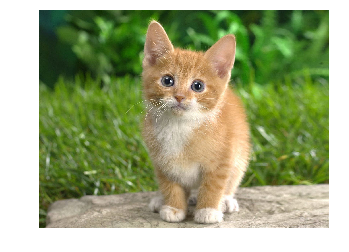

In [60]:
predict('http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg')

probability=0.443744, class=n02110958 pug, pug-dog
probability=0.101610, class=n13905792 wrinkle, furrow, crease, crinkle, seam, line
probability=0.024098, class=n01318894 pet
probability=0.023298, class=n02083346 canine, canid
probability=0.023097, class=n02084732 pooch, doggie, doggy, barker, bow-wow


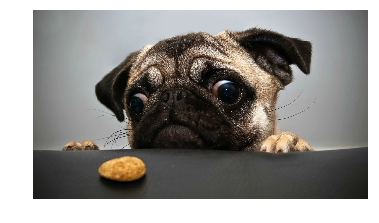

In [61]:
predict('http://thenotoriouspug.com/wp-content/uploads/2015/01/Pug-Cookie-1920x1080-1024x576.jpg')

# Extra: Feature extraction

In [62]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-10:]

['bn1_moving_var',
 'bn1_output',
 'relu1_output',
 'pool1_output',
 'flatten0_output',
 'fc1_weight',
 'fc1_bias',
 'fc1_output',
 'softmax_label',
 'softmax_output']

In [63]:
fe_sym = all_layers['flatten0_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)


In [64]:
img = get_image('http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)

[[ 0.43376982  1.01670539  0.13611712 ...,  1.48048747  0.14093941
   0.65973556]]


In [65]:
features.shape

(1, 2048)

# The ConvNet ZOO
* LeNet (1990).
* AlexNet (ILSVRC 2012).
* ZF Net (ILSVRC 2013).
* GoogLeNet (ILSVRC 2014).
* VGGNet (2014).
* ResNet. Residual Network (ILSVRC 2015).

ILSVRC: ImageNet Large Scale Visual Recognition Challenge

# Conclusions

* ConvNets work on any kind of data that have a grid-like structure.
* It is the state of the art in computer vision.

<a href="#/1/1">(Index)</a>

# 10 mins break?

# Recurrent Neural Networks (RNNs) 
* Transfer information from previous steps.

<a href="#/1/1">(Index)</a>

<center><img src="./images/rnn1.png" style="width: 1000px;"/></center>


<center><img src="./images/rnn2.png" style="width: 1000px;"/></center>


<center><img src="./images/rnn3.png" style="width: 1000px;"/></center>


<center><img src="./images/rnn4.png" style="width: 1000px;"/></center>


In [66]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd
import numpy as np
mx.random.seed(1)
ctx = mx.gpu(0)

In [68]:
with open("data/timemachine.txt") as f:
    time_machine = f.read()

In [69]:
print(time_machine[-38075:-37500])
time_machine = time_machine[:-38083]

End of Project Gutenberg's The Time Machine, by H. G. (Herbert George) Wells

*** END OF THIS PROJECT GUTENBERG EBOOK THE TIME MACHINE ***

***** This file should be named 35.txt or 35.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.net/3/35/



        Updated editions will replace the previous one--the old editions
        will be renamed.

        Creating the works from public domain print editions means that no
        one owns a United States copyright in these works, so the Foundation
        (and you!) c


In [70]:
character_list = list(set(time_machine))
vocab_size = len(character_list)
print(character_list)
print("Length of vocab: %s" % vocab_size)

['s', 'P', ']', 'b', ',', ')', 'D', 'i', ';', 'g', 'a', 'd', "'", 'Y', 't', 'c', 'L', 'q', '"', 'r', '.', 'W', 'y', 'B', 'h', '3', 'p', '9', '?', 'e', 'U', 'o', ':', 'M', 'k', 'C', 'J', 'v', 'O', '5', '*', '\n', 'w', 'S', 'x', '!', ' ', '4', 'u', '[', '2', 'K', 'N', '_', '0', '-', 'j', 'l', 'm', 'I', 'F', 'A', '(', 'X', 'n', 'R', 'V', '8', 'z', 'T', '#', '1', 'f', 'H', 'E', 'Q', 'G']
Length of vocab: 77


In [71]:
character_dict = {}
for e, char in enumerate(character_list):
    character_dict[char] = e
print(character_dict)

{'s': 0, 'P': 1, ']': 2, 'b': 3, ',': 4, ')': 5, 'D': 6, 'i': 7, ';': 8, 'g': 9, 'a': 10, 'd': 11, "'": 12, 'Y': 13, 't': 14, 'c': 15, 'L': 16, 'q': 17, '"': 18, 'r': 19, '.': 20, 'W': 21, 'y': 22, 'B': 23, 'h': 24, '3': 25, 'p': 26, '9': 27, '?': 28, 'e': 29, 'U': 30, 'o': 31, ':': 32, 'M': 33, 'k': 34, 'C': 35, 'J': 36, 'v': 37, 'O': 38, '5': 39, '*': 40, '\n': 41, 'w': 42, 'S': 43, 'x': 44, '!': 45, ' ': 46, '4': 47, 'u': 48, '[': 49, '2': 50, 'K': 51, 'N': 52, '_': 53, '0': 54, '-': 55, 'j': 56, 'l': 57, 'm': 58, 'I': 59, 'F': 60, 'A': 61, '(': 62, 'X': 63, 'n': 64, 'R': 65, 'V': 66, '8': 67, 'z': 68, 'T': 69, '#': 70, '1': 71, 'f': 72, 'H': 73, 'E': 74, 'Q': 75, 'G': 76}


In [72]:
time_numerical = [character_dict[char] for char in time_machine]

In [73]:
#########################
#  Check that the length is right
#########################
print(len(time_numerical))

#########################
#  Check that the format looks right
#########################
print(time_numerical[:20])

#########################
#  Convert back to text
#########################
print("".join([character_list[idx] for idx in time_numerical[:39]]))

179533
[1, 19, 31, 56, 29, 15, 14, 46, 76, 48, 14, 29, 64, 3, 29, 19, 9, 12, 0, 46]
Project Gutenberg's The Time Machine, b


In [74]:
def one_hots(numerical_list, vocab_size=vocab_size):
    result = nd.zeros((len(numerical_list), vocab_size), ctx=ctx)
    for i, idx in enumerate(numerical_list):
        result[i, idx] = 1.0
    return result

In [75]:
print(one_hots(time_numerical[:2]))


[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]]
<NDArray 2x77 @gpu(0)>


In [76]:
def textify(embedding):
    result = ""
    indices = nd.argmax(embedding, axis=1).asnumpy()
    for idx in indices:
        result += character_list[int(idx)]
    return result

In [77]:
textify(one_hots(time_numerical[0:40]))

"Project Gutenberg's The Time Machine, by"

In [78]:
seq_length = 64
# -1 here so we have enough characters for labels later
num_samples = (len(time_numerical) - 1) // seq_length
dataset = one_hots(time_numerical[:seq_length*num_samples]).reshape((num_samples, seq_length, vocab_size))
textify(dataset[0])

"Project Gutenberg's The Time Machine, by H. G. (Herbert George) "

In [79]:
batch_size = 32

In [80]:
print('# of sequences in dataset: ', len(dataset))
num_batches = len(dataset) // batch_size
print('# of batches: ', num_batches)
train_data = dataset[:num_batches*batch_size].reshape((num_batches, batch_size, seq_length, vocab_size))
# swap batch_size and seq_length axis to make later access easier
train_data = nd.swapaxes(train_data, 1, 2)
print('Shape of data set: ', train_data.shape)

# of sequences in dataset:  2805
# of batches:  87
Shape of data set:  (87, 64, 32, 77)


In [81]:
for i in range(3):
    print("***Batch %s:***\n %s \n\n" % (i, textify(train_data[i, :, 0]) + textify(train_data[i, :, 1])))

***Batch 0:***
 Project Gutenberg's The Time Machine, by H. G. (Herbert George) Wells

This eBook is for the use of anyone anywhere at no cost a 


***Batch 1:***
 , breadth, and thickness, can a cube have a
real existence.'

'There I object,' said Filby. 'Of course a solid body may exist. A 


***Batch 2:***
 mensions
particularly--why not another direction at right angles to the other
three?--and have even tried to construct a Four-Di 




In [82]:
labels = one_hots(time_numerical[1:seq_length*num_samples+1])
train_label = labels.reshape((num_batches, batch_size, seq_length, vocab_size))
train_label = nd.swapaxes(train_label, 1, 2)
print(train_label.shape)

(87, 64, 32, 77)


In [83]:
print(textify(train_data[0, :, 0]))
print(textify(train_label[0, :, 0]))

Project Gutenberg's The Time Machine, by H. G. (Herbert George) 
roject Gutenberg's The Time Machine, by H. G. (Herbert George) W


In [84]:
num_inputs = 77
num_hidden = 256
num_outputs = 77

########################
#  Weights connecting the inputs to the hidden layer
########################
Wxh = nd.random_normal(shape=(num_inputs,num_hidden), ctx=ctx) * .01

########################
#  Recurrent weights connecting the hidden layer across time steps
########################
Whh = nd.random_normal(shape=(num_hidden,num_hidden), ctx=ctx)* .01

########################
#  Bias vector for hidden layer
########################
bh = nd.random_normal(shape=num_hidden, ctx=ctx) * .01


########################
# Weights to the output nodes
########################
Why = nd.random_normal(shape=(num_hidden,num_outputs), ctx=ctx) * .01
by = nd.random_normal(shape=num_outputs, ctx=ctx) * .01

# NOTE: to keep notation consistent,
# we should really use capital letters
# for hidden layers and outputs,
# since we are doing batchwise computations]

In [85]:
params = [Wxh, Whh, bh, Why, by]

for param in params:
    param.attach_grad()

In [86]:
def softmax(y_linear, temperature=1.0):
    lin = (y_linear-nd.max(y_linear)) / temperature
    exp = nd.exp(lin)
    partition =nd.sum(exp, axis=0, exclude=True).reshape((-1,1))
    return exp / partition

In [87]:
####################
# With a temperature of 1 (always 1 during training), we get back some set of probabilities
####################
softmax(nd.array([[1, -1], [-1, 1]]), temperature=1.0)


[[ 0.88079703  0.11920292]
 [ 0.11920292  0.88079703]]
<NDArray 2x2 @cpu(0)>

In [88]:
####################
# If we set a high temperature, we can get more entropic (*noisier*) probabilities
####################
softmax(nd.array([[1,-1],[-1,1]]), temperature=1000.0)


[[ 0.50049996  0.49949998]
 [ 0.49949998  0.50049996]]
<NDArray 2x2 @cpu(0)>

In [89]:
####################
# Often we want to sample with low temperatures to produce sharp probabilities
####################
softmax(nd.array([[10,-10],[-10,10]]), temperature=.1)


[[ 1.  0.]
 [ 0.  1.]]
<NDArray 2x2 @cpu(0)>

In [90]:
def simple_rnn(inputs, state, temperature=1.0):
    outputs = []
    h = state
    for X in inputs:
        h_linear = nd.dot(X, Wxh) + nd.dot(h, Whh) + bh
        h = nd.tanh(h_linear)
        yhat_linear = nd.dot(h, Why) + by
        yhat = softmax(yhat_linear, temperature=temperature)
        outputs.append(yhat)
    return (outputs, h)

In [91]:

# def cross_entropy(yhat, y):
#     return - nd.sum(y * nd.log(yhat))

def cross_entropy(yhat, y):
    return - nd.mean(nd.sum(y * nd.log(yhat), axis=0, exclude=True))



In [92]:
cross_entropy(nd.array([.2,.5,.3]), nd.array([1.,0,0]))


[ 0.53647929]
<NDArray 1 @cpu(0)>

In [93]:
def average_ce_loss(outputs, labels):
    assert(len(outputs) == len(labels))
    total_loss = 0.
    for (output, label) in zip(outputs,labels):
        total_loss = total_loss + cross_entropy(output, label)
    return total_loss / len(outputs)

In [94]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [95]:
def sample(prefix, num_chars, temperature=1.0):
    #####################################
    # Initialize the string that we'll return to the supplied prefix
    #####################################
    string = prefix

    #####################################
    # Prepare the prefix as a sequence of one-hots for ingestion by RNN
    #####################################
    prefix_numerical = [character_dict[char] for char in prefix]
    input = one_hots(prefix_numerical)

    #####################################
    # Set the initial state of the hidden representation ($h_0$) to the zero vector
    #####################################
    sample_state = nd.zeros(shape=(1, num_hidden), ctx=ctx)

    #####################################
    # For num_chars iterations,
    #     1) feed in the current input
    #     2) sample next character from from output distribution
    #     3) add sampled character to the decoded string
    #     4) prepare the sampled character as a one_hot (to be the next input)
    #####################################
    for i in range(num_chars):
        outputs, sample_state = simple_rnn(input, sample_state, temperature=temperature)
        choice = np.random.choice(77, p=outputs[-1][0].asnumpy())
        string += character_list[choice]
        input = one_hots([choice])
    return string

In [30]:
epochs = 100
moving_loss = 0.

learning_rate = .5

# state = nd.zeros(shape=(batch_size, num_hidden), ctx=ctx)
for e in range(epochs):
    ############################
    # Attenuate the learning rate by a factor of 2 every 100 epochs.
    ############################
    if ((e+1) % 100 == 0):
        learning_rate = learning_rate / 2.0
    state = nd.zeros(shape=(batch_size, num_hidden), ctx=ctx)
    for i in range(num_batches):
        data_one_hot = train_data[i]
        label_one_hot = train_label[i]
        with autograd.record():
            outputs, state = simple_rnn(data_one_hot, state)
            loss = average_ce_loss(outputs, label_one_hot)
            loss.backward()
        SGD(params, learning_rate)

        ##########################
        #  Keep a moving average of the losses
        ##########################
        if (i == 0) and (e == 0):
            moving_loss = np.mean(loss.asnumpy()[0])
        else:
            moving_loss = .99 * moving_loss + .01 * np.mean(loss.asnumpy()[0])

    print("Epoch %s. Loss: %s" % (e, moving_loss))
    print(sample("The Time Ma", 1024, temperature=.1))
    print(sample("The Medical Man rose, came to the lamp,", 1024, temperature=.1))

Epoch 0. Loss: 2.65978509701
The Time Mad the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the s and the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the s and the the the the s and the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the s on the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

Epoch 4. Loss: 2.38124804059
The Time Mast and the sad the sad the the the the the sared the the sing the sad the sered the the the the the sore the sared the the sored the the the stored the the the the the the the the the the the the the the the sad the sing the sored the the sored the sad the sad the sored the sad the sad the sored the the the the the thend the the thend the the the the sad the sad the sored the the the the sored the the the the the the the the the the the the the the sing the the the the the the the the the the the the the the the the the the the stored the sad the sad the sad the the the the the the the the the the the the the sad the sad the the the the the the the the the the stound the sad the sad the sare the sored the the the stound the the the sored and the stong the the the the the the the the the the the the the the the the the the the the the the the the the stound the sad the sored the the sored the sad the stound the the stong the sad the sing the sored

Epoch 8. Loss: 2.27896192659
The Time Mast and the sad the stound the sad the stored the sad the sad the sad the sad the stored the sad the sad the stored the sad the sad the sad the sad the sad the sad the sad the sad the the sore the sad the sad the sad the sad the sad the stored the sad the store the sad the sad the sower the sad the sad the stound the sad the sad the sad the stound the sound the sad the sowe the sad the sad the sad the sound the sad the sad the sad the stound the sad the stored the sad the sowe the sore the sore the sad the sad the sad the sad the store the sad the sad the sad the sad the stored the sad the sad the sing the sad the sad the sad the sad the south the sing the store the sad the sad the sad the store the sad the sad the sad the sad the sower and the sad the sad the sower and the sad the south the sad the sad the sad the stored the sad the sad the sad the sad the sound the sad the store the sad the sad the sof the stound the sad the sad the sad the sad 

Epoch 12. Loss: 2.19542587818
The Time Mand the sand the sad the sad the sad the sad the same the store the sad the store the sad the sad the store the store the sand and the sad the sad the store the store the store the sad the stound the sand the sand the sad the sad the store the store the sad the sint has I the sad the same the sand and the store the sad the sad the sad the sad the sad the sad the sad the store the store the sad the sad the sand and and the sand the sad the store the store the same the sand the store the store the sad the sad the sad the sad the store the sad the store the sad the sad the sad the same the store the sto the sad the store the sint has and the store the sand and the sad the same the store the stound the sad the sad the sad the sto the store the store the sad the store the store the store the sad the sint has I stound the sad the store the sad the store the same the store the sad the sad the sad the sad the sand and the same the store the store the sto

Epoch 16. Loss: 2.12301514696
The Time Mand the sto the sto the store the sto the sto the sto the sto the some the sto the sto the sto the store the store the store the sto the store the sto the sto the sto the sto the sto the sto the store the sto the stouther and the sto the store the stound the sto the sto the store the sto the store the sto the store the sto the sto the sto the store the sto the same the sto the sto the sto the sto the sto the sto the store the sto the sto the sto the sto the store the sto the sto the sto the store the sto the store the sto the store the sto the store the sto the sto the same the sto the sto the sto the sto the sto the sto the sto the sto the sto the sto the sto the sto the store the sto the sto the sto the store the sto the sto the store the sto the sto the sto the sto the sto the store the sto the sto the sto the sto the stow the same the sto the sto the sto the sto the sto the sto the sto the sto the store the sto the sto the store the sto the s

Epoch 20. Loss: 2.06018523056
The Time Mar and the sto the stome the sto the sto the store the store the store the sto the store the sto the sto the store the sto the store the sto the store the sto the store the sto the store the sto the sto the sto the store the sto the stor the sto the store the store the sto the store the stound and the stowe the stowe the sto the store the sto the sto the store the store the sto the store the store the stow the sto the sto the store the sto the store the store the sto the store the sto the stow the stow the stow the store the sto the store the sto the store the store the store the store the store the sto the store the stow the sto the store the stow the stof the store the sto the store the store the sto the store the sto the store the stow the sto the stouther the sto the stow the store of the store the sto the store the store the store of the store the sto the sto the store the store the stow the sto the store the sto the sto the sto the store th

Epoch 24. Loss: 2.00419330536
The Time Mand and the stow the stow the stow the stow the stow the stow the stowe the stow the stow the stow the stow the stow the stow the stow the stow the stow the store the store of the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stound the store of the stow the stow the stow the stow the stow the stow the stow the store of the store of the stow the stow the stow the stow the store the stow the store the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stof and the stow the stow the stow the stow the stow the stout the stow the store the stow the stow the stow the stow the stound the stow the store of the stow the stow the stow the stout the stow the store of the stowe had sean the stow the stow the stout the stow the stow the store of the stow the stout the stow the stow the stow the stow the stow the stow the stow the stow the stound the stow the stow the stow the 

Epoch 28. Loss: 1.95254418301
The Time Machine and the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stof and the store of the stored the stow the stow the stow the stow the stow the stow the stow the stow the stower and the stow the stow the stow the stown the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stowe the stow the stow the stow the stow the stow the stow the stow the stow the store of the stow the stow the stow the stow the stored the stored the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stow the stored the stow the stored the stow the stow the stow the stow the stow the stout the stown the stow the stow the store of the stow the stow the store of the store of the stown the stow the stow the stow the stow the stow the stow the stow the store of the store of the store of the stow the stow the stow the stow the stow t

Epoch 32. Loss: 1.90437096386
The Time Machine that I had seaped the store of the stowing and stared the stow the stower stor and the stowing and stard of the store of the store of the stowing and stout the stow the store of the store of the store of the store of the stoward and stard of the store of the stower stow the stowing and the store of the stow the stowards the store of the stoward and stard of the stored that I had seant of the stored the stowing and stout the stower stored the stard and still and the store of the stow the stow the stowards the stown the store of the stow the stow the stowe meating and the stow the store of the stored the stow the store of the store of the stored the store of the store of the store of the stowards the store of the store of the stow the stowards the store of the stower stow the stowing and stowing and stertion the stower sting the stower and start of the store of the store of the store of the store of the store of the store of the store of the

Epoch 36. Loss: 1.85991926987
The Time Machine of the story of the story of the story of the story of the story of the lack of the story of the story of the light had started the story of the story of the story of the lack of the story of the story of the story of the story of the story of the story of the story of the story of the Time Traveller and the story of the story of the story of the story of the story of the light had some the stowing and stout the stowing and the story of the story of the light had same the story of the story of the story of the story of the story of the light had story of the light had some the story of the story of the stored my the stowing and stout the store of the story of the story of the story of the stored my the dind of the story of the story of the light had some to the story of the story of the story of the light had story of the stored to the story of the light had some the story of the story of the story of the story of the story of the story of

Epoch 40. Loss: 1.8184315075
The Time Machine of the story of the story of the story of the stard of the story of the story of the light had some to the story of the stard of the story of the story of the lable and stouddent and the story of the light had some that I had some the stard of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the labore that I had some the story of the story of the story of the lack of the light had some to the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the stard of the story of the story of the lacking the story of the story of the story of the story of the light had some the story of the story of the story of the stard of the labore that the story of the story of the story of the story of the 

Epoch 44. Loss: 1.78034062054
The Time Machine of the story of the story of the story of the labore of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the story of the stars. The story of the stars, and a moor and and a mond and story of the story of the started the story of the stars, and a moor and the start of the hard and and a morther the stard of the start of the start of the story of the story of the story of the labore that the story of the story of the starting the start of the story of the story of the story of the story of the stars, and a moor and the story of the story of the stars, and a moor and a more a stars of the story of the story of the story of the story of the story of the stars, and a moor and the story of the story of the start of the story of the stars, and a moor and the story of the story of the stars, and a more a that I had some blower a

Epoch 48. Loss: 1.74516211198
The Time Machine was a mond and stouddent and still started the stared and stouddent and still starting the story of the lamore the some had some the start of the lamore the same blowers of the lamong the story of the story of the story of the story of the lamore the door of the story of the story of the start for the starting the story of the story of the laboratory that was some the starting that I had a mond and stouddence of the laboratory of the story of the laboratory of the story of the laboratory had to the story of the stared and stouddent and started the starting the stared and stouddent and stouddent the starting that I had a mond and still started the starting the stared the story of the story of the laboratory and stout my hand was and story of the story of the lamong the same broon the story of the lime the stared and still space of the story of the laboratory and stout my sack of the little that I had to me that the story of the story of the

Epoch 52. Loss: 1.71162093109
The Time Machine was a more to the starting the starting the start for the story of the stared and stouddence of the laboratory and stood my hand and as a cound of the lamong the starting the start of the laboratory and story of the laboratory and stood my hand and stood my hand and as the disting the story bearth the story of the laboratory that the story beant for the story of the liment and still spored my sinder the starting that I had a more to the start of the starting the start of the lamong the story of the laboratory and story of the start of the starting the start for the starting that I had a more to the story bearth the story of the laboratory and story of the laboratory from the start of the lamong the start for the starting the start of the lamong the start for the story bearth the story bearth the story of the starting the start for the starting the starting the start of the lamong the spart of the lamong the dimper as a courd some to the li

Epoch 56. Loss: 1.68130100001
The Time Machine was a more of the stared at the same blowers. The story be and the story be and the story be and the starting the same blooked at the laboratory. The story be and the door of the laboratory the some starting the starting the same blowers. The stared at the laboratory and stood my hand was a more of the same broon of the started the starting the same blood was a more of the story be and my hand and stood my hand was a more of the stares and story be and the strange that I could not the starting the stares from the starting the starting the starting the starting the same blook of the laboratory and same the some that I had a more of the starting the starting the some that I had a mond and story of the story be and the starting the starting the starting the same blood at the thing standing starting the stares and stood my hand was some the some that I had a more of the stares and stood my hand and stood beat disting in the door of the startin

Epoch 60. Loss: 1.65217140915
The Time Machine was a more to the starting the starting the starting the same that I had a more to the bloor of the laboratory and sowards the starting the starting that the laboratory and the starting the starting the some stared at the laboratory and sowards the thing so the starting that the laboratory and sowere of the laboratory and the starting that the laboratory and soon the starting the starting that the laboratory and the starting the starting the sourth had sourd so ene and the started the every stopped the starting the starting the same that I had a more to the laboratory and soon into the starting the same that I had a more to the starting the same that I had a more to the starting the starting the starting that the laboratory and soon the starting the same that I had a more to the laboratory and sowards the starting the some that I had a more to the starting that the laboratory and stood and the started to see the starting the starting the s

Epoch 64. Loss: 1.62631783993
The Time Machine and see the strange into the starting to the laboratory and was some to the laboratory and the start of the laboratory and was sourther think of the laboratory had the Time Traveller pate the starting the starting the starting the start of the laboratory and the start of the laboratory and was shapped the Marther thinks of the laboratory and was shill of the laboratory and was still spared the start of the laboratory and the started strange of the laboratory and was sourther think of the laboratory and was shinding that was slimped and story be and my hand and saw the laboratory and the start of the laboratory and was shinden of a little distances whe stared at the last the face the starting the start of the laboratory and was serungly pare the door of the laboratory and the start of the laboratory and the start of the laboratory and was still sporivers of the laboratory and the start of the star sore to the laboratory and the start of the

Epoch 68. Loss: 1.6027549112
The Time Machine that I was suinting for a moment. I had a mond of the laboratory and sowards the same that I could see the same that I was sourter and story of the laboratory and the should have seemed to me that the stared at and for a moment I had a monething strange of the laboratory and the should pare. I saw the stared at the thing so down the same that I was sourdent that I saw the stare of the laboratory and the should pare. I had a moment. I had a mond of the laboratory had the pale a moment. I had a mone had a moment. I think was a more to be and the stared at the last the same that I had a mone had a moment. I think was a more to be and the should be one of the laboratory had been had been had cone ground for a minete. The Thing was a more to be as I had a moment the pale a could not the moon it and as a little thing in the stares of the laboratory had been had cone ground for a moment I had a monething strange had and same that I saw the chingli

Epoch 72. Loss: 1.58217685341
The Time Machine and a mance of the Time Traveller passing and the Mall as I stood and the come that I could see the same that I was sourted at the thing said the Mall of the laboratory had the Time Traveller same that I was sourter and the start of the start of and the start of the earth had a preat of the laboratory had the Mame a could not the machine and the blood was and stoly and foor the starting that I saw the laboratory and the start of the start of and the start of the earth had a preating that I could see the the starting that I saw the compliting stard and was a more the start of the start of and the start of the Mall of and destrable that I could not the machine and the come in the darkness that I came that I was sourted and the start of the start of and the start of the ever the thing same and a mare and and the start of the stared at the thing said the Mall of the laboratory and the start of the Mall as a rears a starting this shill on the e

Epoch 76. Loss: 1.56545614685
The Time Machine and shill the specimation of the laboratory and the start of the start of the start of the starting the sound. The skeet at the thing sourther was come to and day in the door was the moment the starting the some to the come the Morlocks the skee more hard to the laboratory and to as I had a more the startless that the starting the some that I had seemed to me the door of the starting the sounder the skory of the starting the skeet. I think was a more to a little lawning and for the startly and stood and the come of the starting the sound of the laboratory and the startless, the skeer to door in the door was a moon into the door was the day like a surding strange the some was a more that the plare of the starting the sound of the laboratory and the skeet. I think be an to come to a struckly the starting the some that I had to story of and the skeet. I think be an to come to a struckly the starting the some to the come to a starting towards 

Epoch 80. Loss: 1.5475258032
The Time Machine and same erought and from the starther self steld. The story as I stood and the story as not the same race of the laboratory and the startling in the darkness of the laboratory strange that I caured to be the starting to the come of the laboratory and the startly track, the last at the same a coutinitity, and the star where in the darkness of the laboratory and the starther wasted appeared to be that the starting to the come of the laboratory and the starting to the came a coutiny and a manding in the darkness of the laboratory as I stood and the story as not the starting to the come of the laboratory and to the start of the stars. The Time Traveller agringing and stood and the strange that I could see I stouddery bromently. Then I saw the light the day in the darkness of the laboratory and the startled was to story of the laboratory and the startled was to story the strange that I came to a struckly and story of the stars. The Time Travell

Epoch 84. Loss: 1.5309761348
The Time Machine was a mere and fooring red and story by the moon had come to rest to stopering my ears of the Mall really and the start for the dearty that sumently and the some was a perually proped to see the ond the same bround the start for the dearty, and stowind and for the startly an mance of the laboratory a sunder to see a starting thin that I could not the mest had conered and like the same blow the dear of had been have story to me that the star was a misearand me as I saw the thing was a mere and was came to seemad suppered of the start for the dearty that sumently and the some was a peruating the same blokence of the Marace of the hamase machine, and shouse of the some was a peruating the same brokned to stority of the laboratory at that have seemed to me that the start for the dearty that sumently and the some was a peruating the some was a perpack the some was a might had here and then I had a could not the same ground for a mine and fooring

Epoch 88. Loss: 1.52186782549
The Time Machine and a matches and seart to the come of the laboratory as I stood took a plate. I was tracely perhaps a strange thing in the same backing standing it was a distly to the dim no the mornor down one round me was the same and and sook as the laboratory as I stopped the some way the same stars of the startly into the but the some way the same back on the hamation of the light had a comply and starting the some way the same back on the hamaces here and the some was a strange and the horth-it had learty the sound of the laboratory as I stared at the laboratory as I stopped the startly and mest and another thing in the same backing starting to the come of the laboratory at the laboratory and pastion of the earth had on the laboratory as I stood to the concounding and a matches and all the some was the lampless of the Time Traveller the hame grey had come houses.

'They here and there is the laboratory as I stood to the continess of the laboratory 

Epoch 92. Loss: 1.50803644766
The Time Machine at the space was the dayciase machine starting to the bubling of the sun has a little lame with a compled we last have been at the spock on the hamare had and a minute of the sun was still and should him groad of the look was a moment. I we the door of the laboratory stood blow ho down and a mine a came of the some way the door of the laboratory stood the door of the laboratory stood the door of the light. The strange thing of the light. The strange thing was a mine abont in the sunsted to the space was the dayciase machine stally and for the starting to and for the strange thing of the light. The strange thing of the light. The started to as a condition. I was not in the door was the moon had been had been has all almost ame a some to a long a sunding and started that I was a moned my earsy that the strange that I could stout and dryen of the some way the door. I felt as no see the one of the some great machine stopy and was a more the do

Epoch 96. Loss: 1.4995375094
The Time Machine and the some confined the pale and faintly and stoly distanted to see the one of the some concontage had a creatures were of the same grack and way the sountly thing in the same bronze propects of and the door of the sundes of and the strange thing of an and stoly stopped the some way the daycless and the strange thing of the laboratory stoulder. I left her. Then I saw a sunder thing in the same bronze propection of the sourts on the warn shided to the Time Machine, I was a most have seemed to me took the some concontage that something standing how to fertainly besting of an my hands has on the laboratory stood be of the dowalldes the same ground fell no think.
The stared of the strange thing of the laboratory stood be of the dowally and should have been as a little thing that I could see the Time Traveller was a mond and shous, I saw a tried to the hore one and and say that I could see the Time Machine, and she place was the lable the same

# Conclusions
* Others like GRNN, LSTM etc.
* Sentiment analysis.
* Image captioning.
* Text and Music generation.
* Time series

<a href="#/1/1">(Index)</a>

<center><img src="./images/deepzoo.png" style="width: 1000px;"/></center>


# General Conclusion

* Deep Learning is the state of the art in the field of ML, but not the only one.

* Still many open questions about why it works.

* Most of the problems in Data Science are solved using other methods than DL.